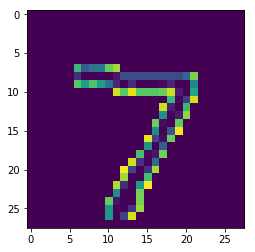

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 74s 1ms/step - loss: 0.2573 - acc: 0.9216 - val_loss: 0.0550 - val_acc: 0.9823
Epoch 2/12
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0881 - acc: 0.9742 - val_loss: 0.0424 - val_acc: 0.9857
Epoch 3/12
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0656 - acc: 0.9805 - val_loss: 0.0351 - val_acc: 0.9875
Epoch 4/12
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0551 - acc: 0.9840 - val_loss: 0.0327 - val_acc: 0.9890
Epoch 5/12
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0460 - acc: 0.9857 - val_loss: 0.0420 - val_acc: 0.9866
Epoch 6/12
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0425 - acc: 0.9866 - val_loss: 0.0301 - val_acc: 0.9903
Epoch 7/12
60000/60000 [==============================]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [13]:
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np


batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_save = x_test
plt_imshow(x_test[0])

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

for i in range(len(y_test)):
    print(y_test[0])
    if y_test[i] == [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]:
        gen_image(x_test[i]).show()
    

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(x_test)
print(y_test)